<a href="https://colab.research.google.com/github/Vaishnavi-Chandrashekar/CC-FRAUD-DETECTION/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [ ]:
#importing the new train data
df = pd.read_csv('new_df.csv')

In [ ]:
#reading the data
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666


In [ ]:
df.shape

(291231, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291231 entries, 0 to 291230
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TRANSACTION_ID       291231 non-null  int64  
 1   TX_DATETIME          291231 non-null  object 
 2   CUSTOMER_ID          291231 non-null  int64  
 3   TERMINAL_ID          291231 non-null  int64  
 4   TX_AMOUNT            291231 non-null  float64
 5   TX_FRAUD             291231 non-null  int64  
 6   x_customer_id        291231 non-null  float64
 7   y_customer_id        291231 non-null  float64
 8   mean_amount          291231 non-null  float64
 9   std_amount           291231 non-null  float64
 10  mean_nb_tx_per_day   291231 non-null  float64
 11  available_terminals  291231 non-null  object 
 12  nb_terminals         291231 non-null  int64  
 13  x_terminal_id        291231 non-null  float64
 14  y_terminal_id        291231 non-null  float64
dtypes: float64(8), in

In [ ]:
df.isnull().sum()

TRANSACTION_ID         0
TX_DATETIME            0
CUSTOMER_ID            0
TERMINAL_ID            0
TX_AMOUNT              0
TX_FRAUD               0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
x_terminal_id          0
y_terminal_id          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Observation:

* There are no null values in the data.
* There are no duplicates in the data.
* All the columns are numerical except for data time column and available terminal column

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,291231.0,204998.000000,84071.292461,59383.000000,132190.500000,204998.000000,277805.500000,350613.000000
CUSTOMER_ID,291231.0,496.256202,285.274966,0.000000,249.000000,498.000000,741.000000,999.000000
TERMINAL_ID,291231.0,993.718526,575.267551,0.000000,496.000000,1000.000000,1483.000000,1999.000000
TX_AMOUNT,291231.0,53.182274,39.573329,0.000000,21.130000,44.770000,76.850000,291.150000
TX_FRAUD,291231.0,0.022601,0.148627,0.000000,0.000000,0.000000,0.000000,1.000000
x_customer_id,291231.0,50.184880,28.732398,0.007245,25.868407,48.968491,74.735746,99.994897
y_customer_id,291231.0,50.429252,28.416998,0.036734,27.459470,49.236141,75.945025,99.996402
mean_amount,291231.0,51.710394,27.475610,5.063101,28.606102,51.641807,75.288972,99.981815
std_amount,291231.0,25.855197,13.737805,2.531550,14.303051,25.820903,37.644486,49.990907
mean_nb_tx_per_day,291231.0,2.650934,0.961907,0.018782,1.956902,2.836935,3.438147,3.999725


Observation:
* TX_AMOUNT 
  * min amount transacted is 0
  * max amount transacted is 291.150000
  * mean amount transacted is 53.182274

#Analysing the Target Variable

In [ ]:
df.TX_FRAUD.nunique()

2

In [ ]:
df.TX_FRAUD.value_counts()

0    284649
1      6582
Name: TX_FRAUD, dtype: int64

<Axes: xlabel='TX_FRAUD', ylabel='count'>

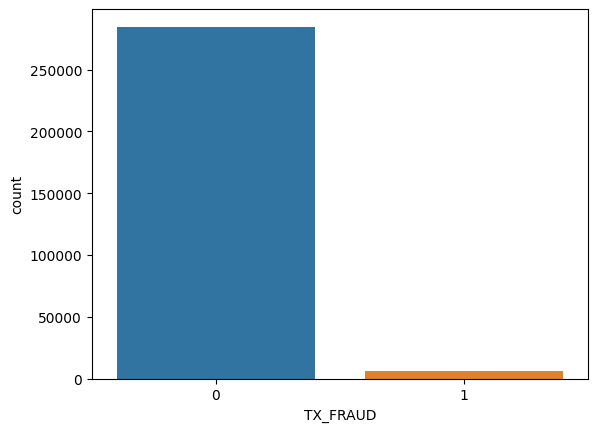

In [ ]:
sns.countplot(data=df, x='TX_FRAUD')

In [ ]:
(df.TX_FRAUD.value_counts()/len(df['TX_FRAUD'])) * 100

0    97.739938
1     2.260062
Name: TX_FRAUD, dtype: float64

Observation:
* Target variable is imbalanced.
* 2.3% of the data is fraudulent 
* 97.74% of the data is legitimate

# Visualizations

In [ ]:
#extracting month, day, date, day of the week, hour from the TX_DATETIME column to check for insights
df['TX_DATETIME'] = pd.to_datetime(df.TX_DATETIME)
df['Month'] = df['TX_DATETIME'].dt.month
df['Day'] = df['TX_DATETIME'].dt.day
df['Date'] = df['TX_DATETIME'].dt.date
df['Dayofweek'] = df['TX_DATETIME'].dt.day_name()
df['Hour'] = df['TX_DATETIME'].dt.hour

In [ ]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals,x_terminal_id,y_terminal_id,Month,Day,Date,Dayofweek,Hour
0,59383,2021-08-01 00:04:37,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,"[51, 68, 208, 217, 293, 353, 534, 717, 773, 86...",19,80.316334,40.239252,8,1,2021-08-01,Sunday,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,"[163, 172, 205, 429, 468, 607, 750, 786, 881, ...",16,15.172487,63.912685,8,1,2021-08-01,Sunday,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,"[58, 799, 1011, 1021, 1228, 1347, 1443, 1462, ...",13,74.196424,98.288079,8,1,2021-08-01,Sunday,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,"[27, 493, 584, 734, 820, 917, 1108, 1363, 1444...",15,51.950635,6.563484,8,1,2021-08-01,Sunday,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,"[154, 177, 351, 444, 633, 739, 1018, 1056, 113...",20,62.417972,26.483666,8,1,2021-08-01,Sunday,0


<Axes: xlabel='Month', ylabel='count'>

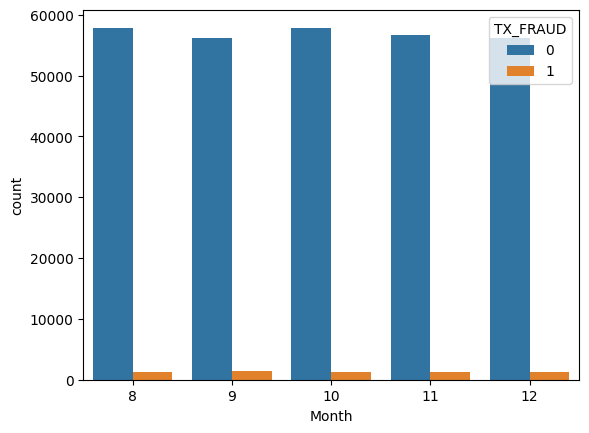

In [ ]:
#month wrt target variable
sns.countplot(data=df, x="Month", hue="TX_FRAUD")

Observation:
* Number of fradulent cases are almost same every month.


<Axes: xlabel='Day', ylabel='count'>

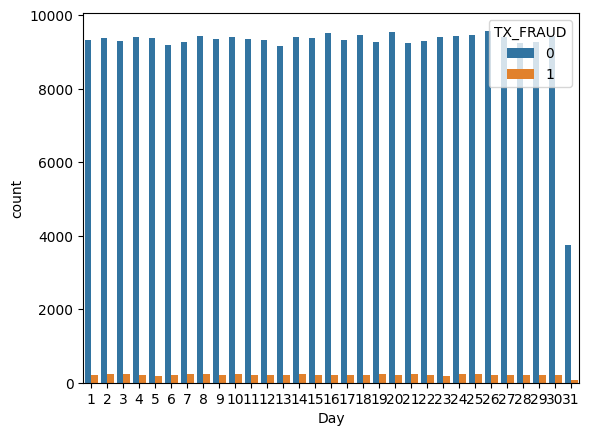

In [ ]:
#days wrt target variable
sns.countplot(data=df, x="Day", hue="TX_FRAUD")

Observation:
* Number of fradulent cases are more or less the same every day

<Axes: xlabel='Dayofweek', ylabel='count'>

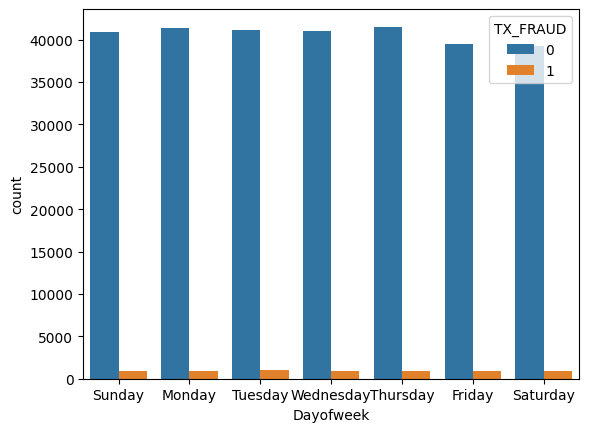

In [ ]:
#day of the week wrt target variable
sns.countplot(data=df, x="Dayofweek", hue="TX_FRAUD")

Observations:
* Number of fradulent cases are almost same every day.
* Most number of legitimate transactions are made on Thursday
* Least number of legitimate transactions are made on Saturday.


<Axes: xlabel='nb_terminals', ylabel='count'>

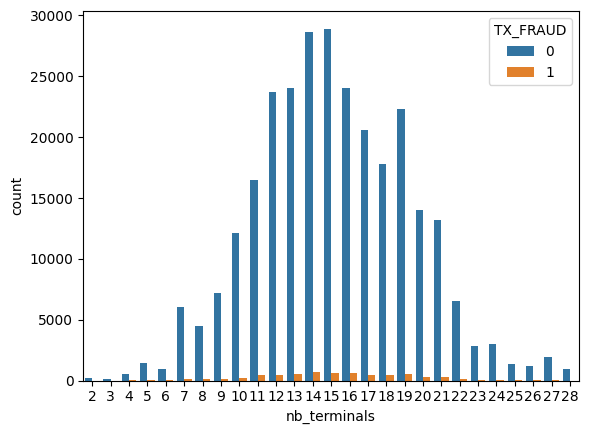

In [ ]:
sns.countplot(data=df, x="nb_terminals", hue="TX_FRAUD")

Observations:
* Highest number of fradulent transactions is when the number of terminals that the customer can make transactions is 14. 
* Fradulent transactions are the most where the number of terminals that the customer can make transactions is between 11 and 21.  
* Highest number of legitimate transactions are when the number of terminals that the customer can make transactions is 15 follwed by 14.
* Therefore, when the number of terminals that the customer can make transactions is 14 and 15 most number of legitimate as well as fradulent transactions are made.

<Axes: xlabel='Hour', ylabel='count'>

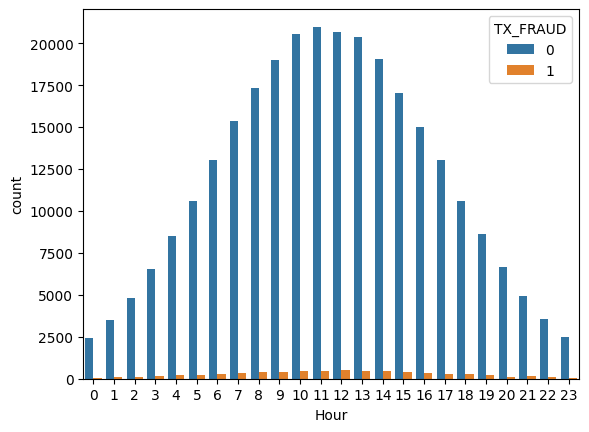

In [ ]:
sns.countplot(data=df, x='Hour', hue = 'TX_FRAUD')

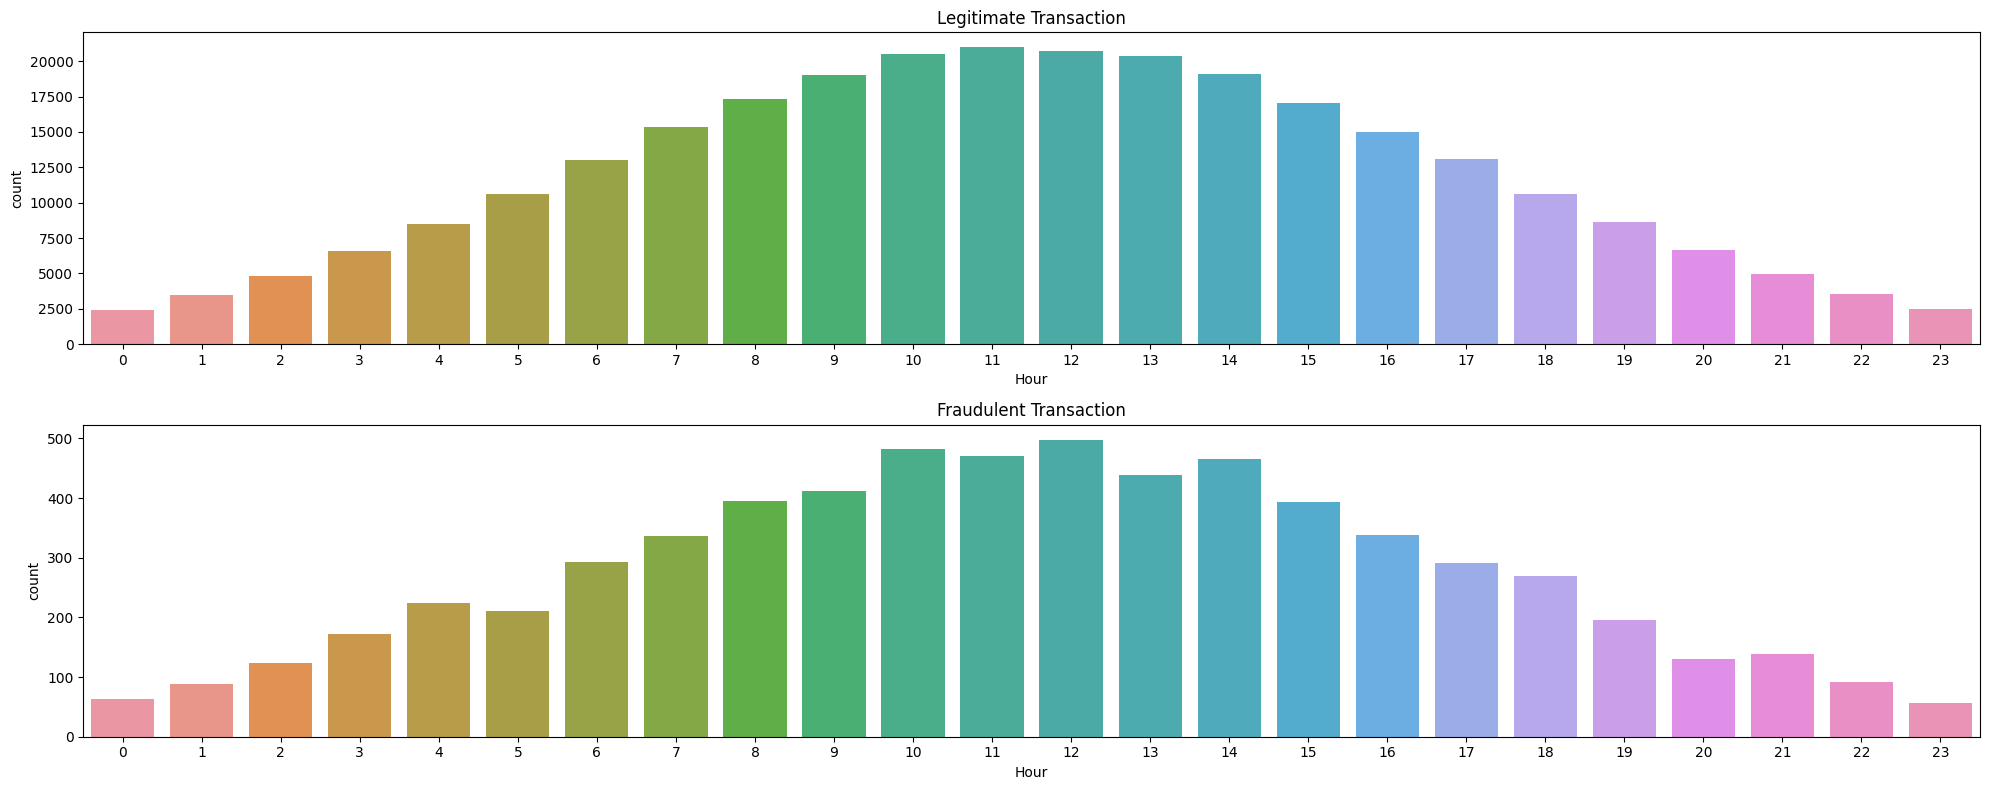

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Legitimate Transaction")
sns.countplot(data=df[ df.TX_FRAUD == 0 ], x= 'Hour', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.countplot(data=df[ df.TX_FRAUD == 1 ], x= 'Hour', ax=axs[1])

plt.tight_layout()

Observations:
* Highest number of fradulent transactions has taken place in the 12th hour.
* Most number of fradulent transactions has taken place in between the 4th and 19th hour of the day
* Highest number of legitimate transactions has taken place at the 11th hour follwed by the 12th hour and 10th hour.
* Therefore, at the 12th hour most of the legitimate and fradulent transactions has taken place.

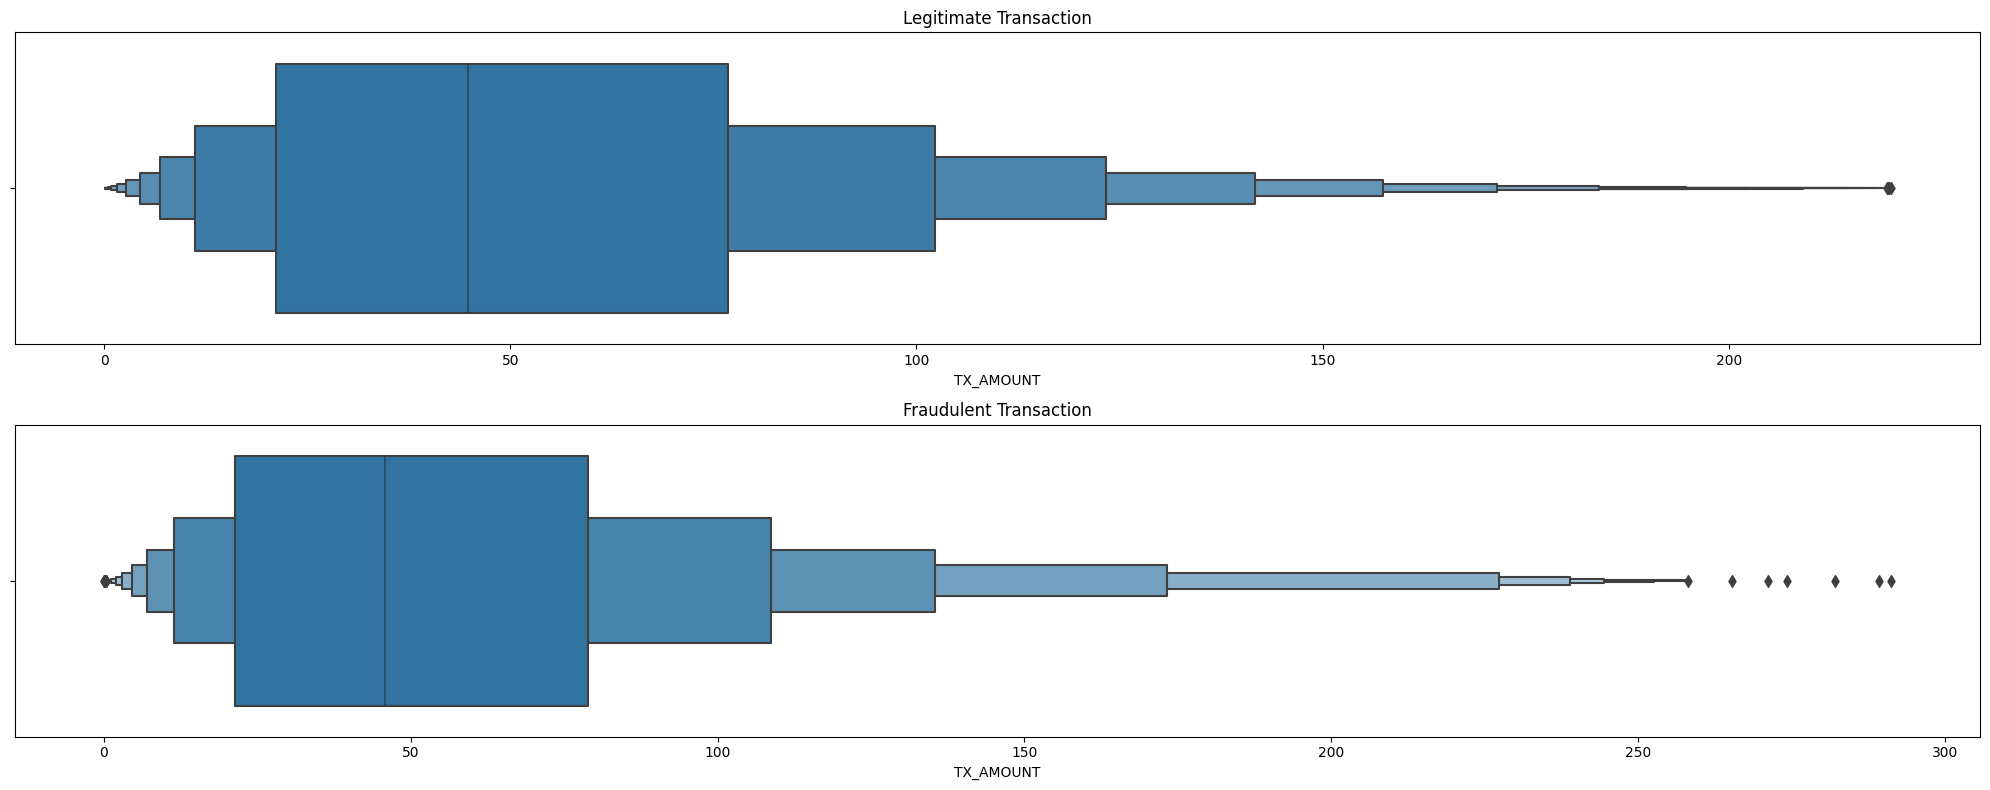

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Legitimate Transaction")
sns.boxenplot(data=df[ df.TX_FRAUD == 0 ], x= 'TX_AMOUNT', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=df[ df.TX_FRAUD == 1 ], x= 'TX_AMOUNT', ax=axs[1])

plt.tight_layout()

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(10, 3))
    plt.title("Distribution for {}".format(feature))
    plot1 = sns.kdeplot(df[df['TX_FRAUD'] == 0][feature].dropna(), color= 'grey', label= 'FRAUD: No', fill = True)
    plot2 = sns.kdeplot(df[df['TX_FRAUD'] == 1][feature].dropna(), color= 'Red', label= 'FRAUD: Yes')
    plt.legend(["LEGITMATE","FRAUDULENT"],loc='upper right')

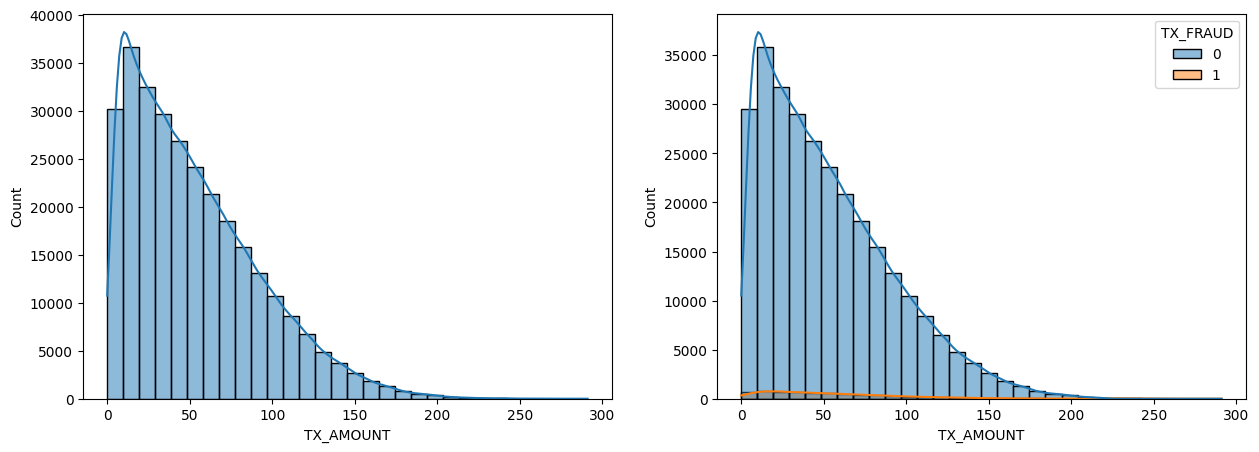

In [ ]:
## kde for amount transacted 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= df, x= 'TX_AMOUNT', bins= 30, kde= True)
plt.subplot(1, 2, 2)
sns.histplot(data= df, x= 'TX_AMOUNT', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

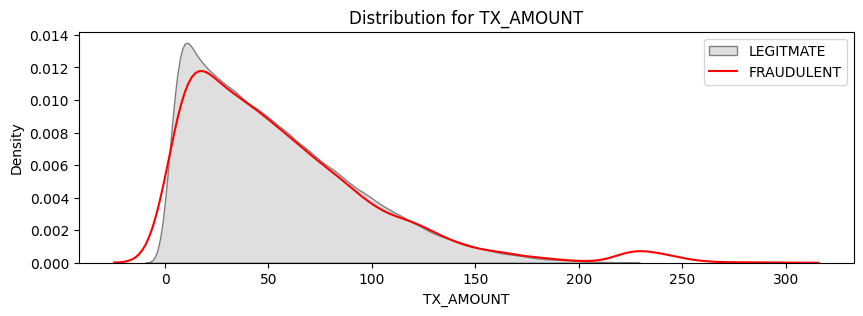

In [ ]:
kdeplot('TX_AMOUNT')

Observation:
* min amount transaction is 0
* max amount transaction is 291.15
* more number of fradulent cases are taking place when the amount transaction is between 0 and 50
* its right skewed

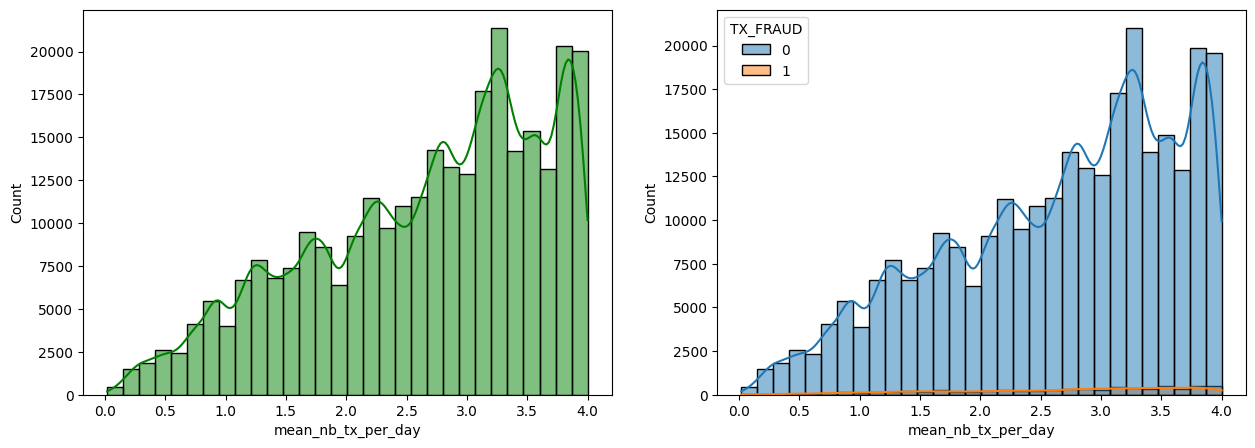

In [ ]:
## kde for mean transaction per day
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data= df, x= 'mean_nb_tx_per_day', bins= 30, kde= True, color='green')
plt.subplot(1, 2, 2)
sns.histplot(data= df, x= 'mean_nb_tx_per_day', bins= 30, kde= True, hue= 'TX_FRAUD')
plt.show()

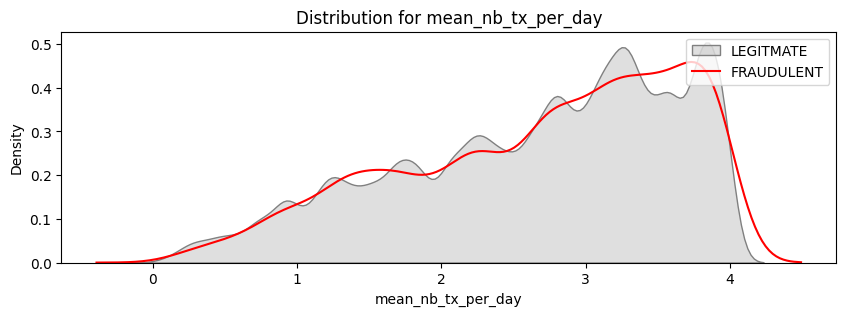

In [ ]:
kdeplot('mean_nb_tx_per_day')

Observation:
* min number of transactions per day is 0
* max number of transaction per day is 4
* fradulent is increasing as the number of transactions are more

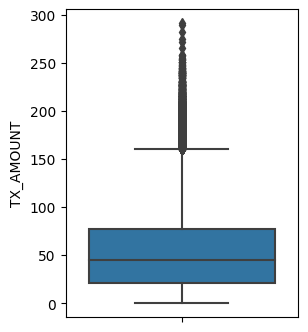

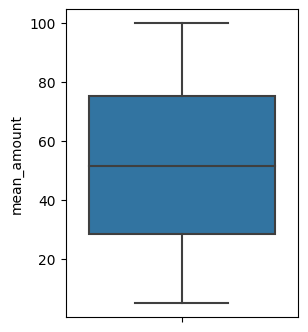

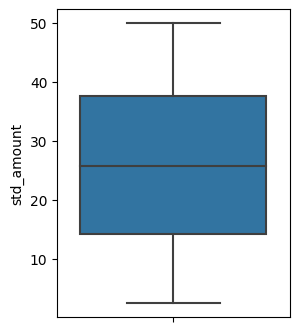

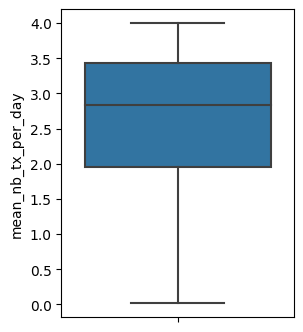

In [ ]:
column_names = ['TX_AMOUNT','mean_amount','std_amount','mean_nb_tx_per_day']
def identify_outliers(give_df_name, give_column_name):
    for i in column_names:
        fig = plt.figure(figsize=(3,4))
        sns.boxplot(data = df, y = i)
plt.show()

identify_outliers(df, column_names)

Q1 = 21.13 Q2 =  44.77 Q3 =  76.85
upper 160.43
lower -62.45


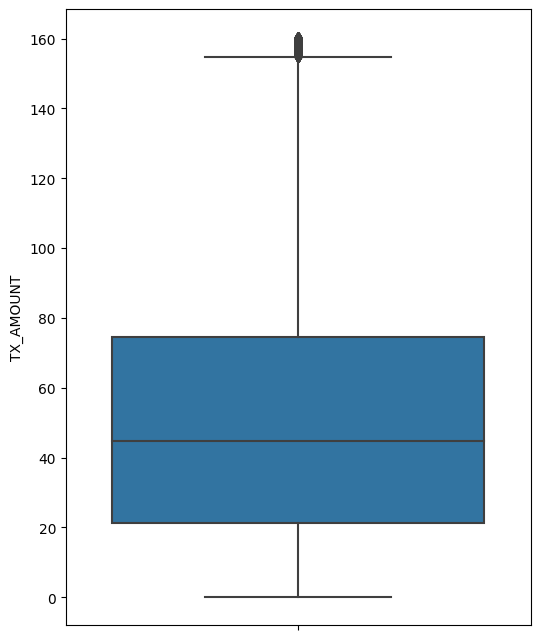

In [ ]:
Q1 = np.percentile(df['TX_AMOUNT'], 25)
Q2 = np.percentile(df['TX_AMOUNT'], 50)
Q3 = np.percentile(df['TX_AMOUNT'], 75)
IQR = Q3 - Q1        
print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

upper_val = Q3 + (1.5 * IQR)
print('upper', upper_val)
lower_val = Q1 - (1.5 * IQR)
print('lower', lower_val)

df.loc[df['TX_AMOUNT'] > upper_val, 'TX_AMOUNT'] = np.median(df['TX_AMOUNT'])
df.loc[df['TX_AMOUNT'] < lower_val, 'TX_AMOUNT'] = np.median(df['TX_AMOUNT'])
        
fig = plt.figure(figsize = (6,8))
sns.boxplot(data = df,y = 'TX_AMOUNT')
plt.xticks(rotation = 'horizontal')
plt.show()

In [ ]:
# applying log transformation on 'TX_AMOUNT' as the data is skewed
#df_tx_amount = np.log(df['TX_AMOUNT'])

#correlation

In [ ]:
#dropping a few columns 
#drop_cols = df['TX_DATETIME','Month', 'Day', 'Date', 'Dayofweek', 'Hour','available_terminals']
df = df.drop(['TX_DATETIME','Month', 'Day', 'Date', 'Dayofweek', 'Hour','available_terminals'], axis=1)

In [ ]:
df.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals,x_terminal_id,y_terminal_id
0,59383,323,217,4.60,0,84.515409,38.276422,7.353061,3.676530,3.324124,19,80.316334,40.239252
1,59384,6,429,8.61,0,11.827443,63.992102,18.618562,9.309281,3.778676,16,15.172487,63.912685
2,59385,714,1011,64.00,0,75.221083,94.991427,82.620413,41.310207,3.723765,13,74.196424,98.288079
3,59386,266,1969,12.72,0,51.122179,8.329098,9.852171,4.926085,3.862067,15,51.950635,6.563484
4,59387,890,1482,98.88,0,62.777887,31.405270,83.660035,41.830018,3.128315,20,62.417972,26.483666


<Axes: >

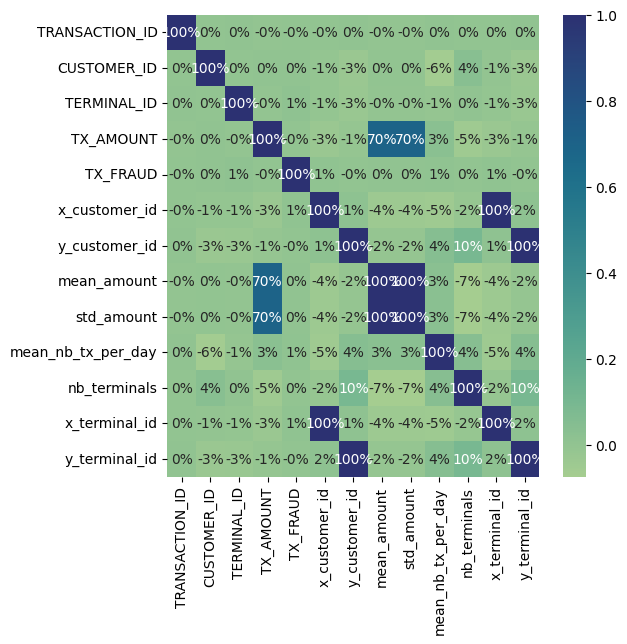

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap="crest", annot = True, fmt = '.0%')